In [1]:
#https://stackoverflow.com/questions/43990046/tensorflow-blas-gemm-launch-failed
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU') 
#tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Descriptors
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso, LassoCV
from sklearn.model_selection import train_test_split, cross_val_predict, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from math import sqrt

from kerastuner.tuners import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters
from tensorflow.keras.models import Sequential, save_model, load_model
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Conv1D, MaxPooling1D, Dense, Flatten, Activation
import time
from sklearn.metrics import r2_score
import kerastuner as kt

from collections import Counter 
import pickle
import pandas as pd
import collections
import seaborn as sns

In [3]:
#dataset-1 with Tg
Dataset1_Smiles_P = pd.read_csv("dataset1_imputed_all.csv")
Dataset1_Smiles_P = Dataset1_Smiles_P.groupby('Smiles').mean().reset_index()

In [4]:
Dataset1_Smiles_P

,Smiles,Unnamed: 0,index,Year,He,H2,O2,N2,CO2,CH4,...,log10_O2_Bayesian,log10_N2_Bayesian,log10_CO2_Bayesian,log10_CH4_Bayesian,log10_He_Etree,log10_H2_Etree,log10_O2_Etree,log10_N2_Etree,log10_CO2_Etree,log10_CH4_Etree
0,*/C(=C(\*)c1ccc(-c2ccc(C(C)(C)C)cc2)cc1)c1ccccc1,750.5,269.5,2010.0,215.0,455.0,195.00,70.500,1220.00,190.000,...,2.264458,1.820241,3.064200,2.247077,2.322711,2.640971,2.264458,1.820241,3.064200,2.247077
1,*/C(=C(\*)c1ccc(-c2ccc([Si](C)(C)C)cc2)cc1)c1c...,743.0,262.0,2010.0,370.0,810.0,390.00,160.000,2200.00,450.000,...,2.591065,2.204120,3.342423,2.653213,2.568202,2.908485,2.591065,2.204120,3.342423,2.653213
2,*/C(=C(\*)c1ccc(-c2ccccc2)cc1)c1ccccc1,749.0,268.0,2010.0,200.0,440.0,180.00,65.000,1300.00,170.000,...,2.255273,1.812913,3.113943,2.230449,2.301030,2.643453,2.255273,1.812913,3.113943,2.230449
3,*/C(=C(\*)c1ccc(C(C)(C)C)cc1)c1ccc(O)cc1,707.0,226.0,2006.0,190.0,340.0,82.00,23.000,530.00,46.000,...,1.913814,1.361728,2.724276,1.662758,2.278754,2.531479,1.913814,1.361728,2.724276,1.662758
4,*/C(=C(\*)c1ccc(C(C)(C)C)cc1)c1ccc(O[Si](C)(C)...,703.0,222.0,2006.0,530.0,1000.0,470.00,210.000,2300.00,540.000,...,2.672098,2.322219,3.361728,2.732394,2.724276,3.000000,2.672098,2.322219,3.361728,2.732394
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348,*c1ccc2c(c1)C1(CC2(C)C)CC(C)(C)c2ccc(N3C(=O)c4...,653.0,144.0,2013.0,332.0,624.0,208.00,65.000,1523.00,129.000,...,2.318063,1.812913,3.182700,2.110590,2.521138,2.795185,2.318063,1.812913,3.182700,2.110590
349,*c1cccc(N2C(=O)c3ccc(Oc4ccc(C(C)(C)c5ccc(Oc6cc...,409.5,409.5,1994.0,9.4,NaN,0.37,0.051,1.33,0.036,...,-0.434351,-1.231009,0.121595,-1.291081,0.927353,0.736209,-0.434351,-1.295008,0.103035,-1.443242
350,*c1cccc(N2C(=O)c3ccc(Oc4ccc(C5(c6ccc(Oc7ccc8c(...,543.0,543.0,1989.0,NaN,NaN,0.30,NaN,NaN,NaN,...,-0.522879,-1.214076,0.077487,-1.185679,0.874861,0.748087,-0.522879,-1.311811,0.037426,-1.428914
351,*c1cccc(N2C(=O)c3ccc(Oc4ccc5c(c4)C4(CC(C)(C)c6...,542.0,542.0,1989.0,NaN,NaN,2.82,NaN,NaN,NaN,...,0.450249,-0.168164,1.061415,-0.075697,1.294916,1.406761,0.450249,-0.120979,1.151142,-0.084523


In [5]:
#dataset-1 fingerprint
molecules = Dataset1_Smiles_P.Smiles.apply(Chem.MolFromSmiles)

fp = molecules.apply(lambda m: AllChem.GetMorganFingerprint(m, radius=3))
fp_n = fp.apply(lambda m: m.GetNonzeroElements())

In [6]:
# using substructures in dataset-1 to construct a dictionary
HashCode = []
for i in fp_n:
    for j in i.keys():
        HashCode.append(j)
        
unique_set = set(HashCode)
unique_list = list(unique_set)

Corr_df = pd.DataFrame(unique_list).reset_index()

In [7]:
#construct dataset-1 input
MY_finger = []
for polymer in fp_n:
    my_finger = [0] * len(unique_list)
    for key in polymer.keys():
        index = Corr_df[Corr_df[0] == key]['index'].values[0]
        my_finger[index] = polymer[key]
    MY_finger.append(my_finger)
    
MY_finger_dataset_1 = pd.DataFrame(MY_finger)  

In [135]:
# filter input into the most popular 124 substructures
Zero_Sum = (MY_finger_dataset_1 == 0).astype(int).sum()
NumberOfZero = 6400
print(len(Zero_Sum[Zero_Sum < NumberOfZero]))
X_fingerprints = MY_finger_dataset_1[Zero_Sum[Zero_Sum < NumberOfZero].index]

3209


In [ ]:
#do the same iwth dataset2
#dataset-2 no permeability
ID_noTg_pred = pd.read_csv("Dataset2_Smiles.csv")

#dataset-2 fingerprint
molecules_noTg_pred = ID_noTg_pred.Smiles.apply(Chem.MolFromSmiles)

fp_noTg_pred = molecules_noTg_pred.apply(lambda m: AllChem.GetMorganFingerprint(m, radius=3))
fp_noTg_pred_n = fp_noTg_pred.apply(lambda m: m.GetNonzeroElements())

#construct dataset-2 input
MY_finger = []
for polymer in fp_noTg_pred_n:
    my_finger = [0] * len(unique_list)
    for key in polymer.keys():
        if key in list(Corr_df[0]):
            index = Corr_df[Corr_df[0] == key]['index'].values[0]
            my_finger[index] = polymer[key]
    MY_finger.append(my_finger)

MY_finger_dataset_2 = pd.DataFrame(MY_finger)
X_dataset_2 = MY_finger_dataset_2[Zero_Sum[Zero_Sum < NumberOfZero].index]

In [11]:
#get the descriptors from SMILES
#mol = Chem.MolFromSmiles(grouped.loc[200, 'Smiles'])
#calculator = MolecularDescriptorCalculator()
#calculator.CalcDescriptors(mol)

### Lasso

In [124]:
Y = Dataset1_Smiles_P['log10_CO2_Bayesian']
X_fingerprints
np.linspace(x_start, x_end, num=100)

array([-4.03544195, -3.93047087, -3.8254998 , -3.72052872, -3.61555765,
       -3.51058657, -3.4056155 , -3.30064442, -3.19567335, -3.09070227,
       -2.9857312 , -2.88076012, -2.77578905, -2.67081797, -2.5658469 ,
       -2.46087582, -2.35590475, -2.25093367, -2.1459626 , -2.04099152,
       -1.93602045, -1.83104937, -1.7260783 , -1.62110722, -1.51613615,
       -1.41116507, -1.306194  , -1.20122292, -1.09625185, -0.99128077,
       -0.8863097 , -0.78133862, -0.67636755, -0.57139647, -0.4664254 ,
       -0.36145432, -0.25648325, -0.15151217, -0.0465411 ,  0.05842998,
        0.16340105,  0.26837213,  0.3733432 ,  0.47831428,  0.58328535,
        0.68825643,  0.7932275 ,  0.89819858,  1.00316965,  1.10814073,
        1.2131118 ,  1.31808288,  1.42305395,  1.52802503,  1.6329961 ,
        1.73796718,  1.84293825,  1.94790933,  2.0528804 ,  2.15785148,
        2.26282255,  2.36779363,  2.4727647 ,  2.57773578,  2.68270685,
        2.78767793,  2.892649  ,  2.99762008,  3.10259115,  3.20

In [101]:
# hyperparameters
#X_dataset_1, Y = shuffle(X_dataset_1, Y, random_state=0)
X_train, X_test, Y_train, Y_test = train_test_split(X_dataset_1, Y, test_size=0.2, random_state=42)
alpha = 0.1
cv = 10

# build model
model = Lasso(alpha=alpha).fit(X_train, Y_train)
# get prediction
Y_pred_train = cross_val_predict(model, X_train, Y_train, cv=cv) # cross-validation
Y_pred_test = cross_val_predict(model, X_test, Y_test, cv=cv)
# calculate the metrics
final_R2 = r2_score(Y_train,Y_pred_train)
final_MAE = mean_absolute_error(Y_train,Y_pred_train)
# metrics of the score
scores = cross_validate(model, X_train, Y_train, cv=cv,
scoring=('r2', 'neg_mean_absolute_error'),return_train_score=True)
# save the score
score_df = pd.DataFrame.from_dict(scores)
# save the model
#pickle.dump(model, open("./LASSO.model", 'wb'))
wts = model.coef_
#np.savetxt("./weights.txt", wts, fmt="%5.3f")


Training R2: 0.5918727905541844
Training MAE: 0.8298896100675273
Test R2: 0.39736726254766364
Test MAE: 0.8991920848172988


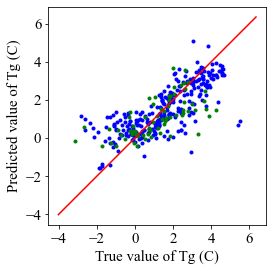

In [126]:
print('Training R2:',r2_score(Y_train,Y_pred_train))
print('Training MAE:',mean_absolute_error(Y_train,Y_pred_train))
print('Test R2:',r2_score(Y_test,Y_pred_test))
print('Test MAE:',mean_absolute_error(Y_test,Y_pred_test))
# plot the result
ax=plt.subplot(1, 1, 1)
plt.plot(Y_train,Y_pred, 'b.')
plt.plot(Y_test,Y_pred_test, 'g.')
plt.xlabel("True value of Tg (C)",fontname="Times New Roman", fontsize=15)
plt.ylabel("Predicted value of Tg (C)",fontname="Times New Roman", fontsize=15)
x0, x1 = Y.min(), Y.max()
length = x1 - x0
x_start, x_end = x0-0.1*length, x1+0.1*length
#plt.xlim([x_start, x_end])
#plt.ylim([x_start, x_end])
#ax.set_xticks([-200,-100,0,100,200,300,400,500])
#ax.set_yticks([-200,-100,0,100,200,300,400,500])
plt.xticks(fontname="Times New Roman", fontsize=15)
plt.yticks(fontname="Times New Roman", fontsize=15)
plt.gca().set_aspect("equal", adjustable="box")
# the unit line
plt.plot(np.linspace(x_start, x_end, num=100), np.linspace(x_start, x_end, num=100), 'r-')
#plt.text(x_end - 0.4*length, x_start + 0.10*length, "$R^2={:.2f}$".format(final_R2))
#plt.text(x_end - 0.4*length, x_start + 0.05*length, "MAE={:.2f}".format(final_MAE))
#plt.savefig("./LASSO_cv_fingerprint.png", dpi=600, bbox_inches='tight')
#plt.savefig("LASSO_cv_fingerprint.svg", bbox_inches='tight')
plt.show()

In [103]:
weights_df = pd.DataFrame()

In [104]:
weights_df['descriptor_id'] = Zero_Sum[Zero_Sum < NumberOfZero].index
weights_df['wt'] = wts
weights_df['abswt'] = abs(wts)

# find the main feature
coeffs = abs(wts)
coeffs = coeffs/sum(coeffs)
weights_df['ratio'] = coeffs

ordered_wts = weights_df.sort_values(['ratio'], ascending=0)
# add cumulative sum
ordered_wts['cumsum'] = ordered_wts['ratio'].to_numpy().cumsum()
ordered_wts[ordered_wts['cumsum'] <0.8]

print(ordered_wts)
print(Corr_df)

      descriptor_id        wt     abswt     ratio    cumsum
2706           2706 -0.336604  0.336604  0.182132  0.182132
1781           1781  0.288407  0.288407  0.156054  0.338186
298             298 -0.271656  0.271656  0.146990  0.485176
822             822  0.209667  0.209667  0.113448  0.598624
2854           2854  0.168795  0.168795  0.091333  0.689958
...             ...       ...       ...       ...       ...
1075           1075  0.000000  0.000000  0.000000  1.000000
1076           1076  0.000000  0.000000  0.000000  1.000000
1077           1077 -0.000000  0.000000  0.000000  1.000000
1078           1078 -0.000000  0.000000  0.000000  1.000000
3208           3208 -0.000000  0.000000  0.000000  1.000000

[3209 rows x 5 columns]
      index           0
0         0   966434816
1         1  3870277633
2         2   254107648
3         3   900325378
4         4  3925172229
...     ...         ...
3204   3204   351010789
3205   3205  4038508520
3206   3206  1757216757
3207   3207  35

In [105]:
ordered_wts[ordered_wts['cumsum'] <0.8]

,descriptor_id,wt,abswt,ratio,cumsum
2706,2706,-0.336604,0.336604,0.182132,0.182132
1781,1781,0.288407,0.288407,0.156054,0.338186
298,298,-0.271656,0.271656,0.146990,0.485176
822,822,0.209667,0.209667,0.113448,0.598624
2854,2854,0.168795,0.168795,0.091333,0.689958
2217,2217,0.096756,0.096756,0.052354,0.742311
2984,2984,0.092839,0.092839,0.050234,0.792545


### CNN

In [128]:
smiles = Dataset1_Smiles_P['Smiles']
START_TOKEN = '?'
END_TOKEN = '!'
NULL_TOKEN = '~'

V = sorted(set(''.join(smiles.unique().tolist())))
V.append(END_TOKEN)
V.append(NULL_TOKEN)
V.append(START_TOKEN)
vocab_dim = len(V)
smiles_ = [np.array([V.index(c) for c in s] + [V.index(END_TOKEN)]).astype(np.int32) for s in smiles]
smilesdf = pd.DataFrame(smiles_, index=smiles.index)
smilesdf = smilesdf.fillna(value=V.index(NULL_TOKEN))
X = smilesdf
X

,0,1,2,3,4,5,6,7,8,9,...,181,182,183,184,185,186,187,188,189,190
0,4,6,19,2,17.0,19.0,2.0,26.0,4.0,3.0,...,36.0,36.0,36.0,36.0,36.0,36.0,36.0,36.0,36.0,36.0
1,4,6,19,2,17.0,19.0,2.0,26.0,4.0,3.0,...,36.0,36.0,36.0,36.0,36.0,36.0,36.0,36.0,36.0,36.0
2,4,6,19,2,17.0,19.0,2.0,26.0,4.0,3.0,...,36.0,36.0,36.0,36.0,36.0,36.0,36.0,36.0,36.0,36.0
3,4,6,19,2,17.0,19.0,2.0,26.0,4.0,3.0,...,36.0,36.0,36.0,36.0,36.0,36.0,36.0,36.0,36.0,36.0
4,4,6,19,2,17.0,19.0,2.0,26.0,4.0,3.0,...,36.0,36.0,36.0,36.0,36.0,36.0,36.0,36.0,36.0,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348,4,28,8,28,28.0,28.0,9.0,28.0,2.0,28.0,...,36.0,36.0,36.0,36.0,36.0,36.0,36.0,36.0,36.0,36.0
349,4,28,8,28,28.0,28.0,28.0,2.0,21.0,9.0,...,36.0,36.0,36.0,36.0,36.0,36.0,36.0,36.0,36.0,36.0
350,4,28,8,28,28.0,28.0,28.0,2.0,21.0,9.0,...,36.0,36.0,36.0,36.0,36.0,36.0,36.0,36.0,36.0,36.0
351,4,28,8,28,28.0,28.0,28.0,2.0,21.0,9.0,...,36.0,36.0,36.0,36.0,36.0,36.0,36.0,36.0,36.0,36.0


In [129]:
Y = Dataset1_Smiles_P.iloc[:,-12:-6]
X = np.array(X)
X= X.reshape((X.shape[0], X.shape[1], 1))
Y = np.array(Y)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [130]:
model = Sequential()
model.add(Conv1D(64, 3, activation='relu', padding="same", input_shape = (x_train.shape[1],x_train.shape[2])))
model.add(Conv1D(32, 3, activation='relu', padding="same"))
model.add(Conv1D(16, 3, activation='relu', padding="same"))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(8))
model.add(Dense(8))
model.add(Dense(6))
optimizer=keras.optimizers.Adam(lr=0.005)
model.compile(optimizer=optimizer, loss='mean_absolute_error')
Model=model.fit(x=x_train,y=y_train,epochs=75,batch_size=16,validation_split=0.2)

Epoch 1/75
15/15 [==============================] - 1s 17ms/step - loss: 4.1993 - val_loss: 1.4469
Epoch 2/75
15/15 [==============================] - 0s 10ms/step - loss: 1.3843 - val_loss: 1.2279
Epoch 3/75
15/15 [==============================] - 0s 9ms/step - loss: 1.2380 - val_loss: 1.1491
Epoch 4/75
15/15 [==============================] - 0s 10ms/step - loss: 1.2353 - val_loss: 1.0982
Epoch 5/75
15/15 [==============================] - 0s 10ms/step - loss: 1.1928 - val_loss: 1.0586
Epoch 6/75
15/15 [==============================] - 0s 10ms/step - loss: 1.0035 - val_loss: 0.9654
Epoch 7/75
15/15 [==============================] - 0s 9ms/step - loss: 0.9707 - val_loss: 0.9677
Epoch 8/75
15/15 [==============================] - 0s 9ms/step - loss: 1.0316 - val_loss: 1.0039
Epoch 9/75
15/15 [==============================] - 0s 9ms/step - loss: 0.9710 - val_loss: 0.9481
Epoch 10/75
15/15 [==============================] - 0s 10ms/step - loss: 0.9811 - val_loss: 0.8850
Epoch 11/75
1

Train set R^2:  0.7045358300892121
Mean Absolute Error on Training Set =  3.541217517754944
Test set R^2:  0.5874604381047872
Mean Absolute Error on Test Set =  4.922731527864758


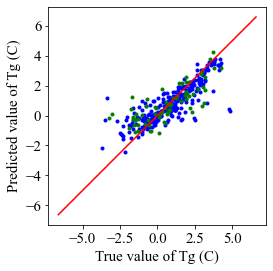

In [132]:
column = 2
y_predtrain=model.predict(x_train)
y_predtest=model.predict(x_test)
y_pred_train = model.predict((x_train))
print("Train set R^2: ", r2_score(y_train, y_pred_train))
MAE_train=np.mean(abs(y_predtrain-y_train).sum()/y_train.shape[0])
print("Mean Absolute Error on Training Set = ",MAE_train.item())

y_pred_test = model.predict((x_test))
print("Test set R^2: ", r2_score(y_test, y_pred_test))
MAE_test=np.mean(abs(y_predtest-y_test).sum()/y_test.shape[0])
print("Mean Absolute Error on Test Set = ",MAE_test.item())

ax=plt.subplot(1, 1, 1)
plt.plot( y_train[:,column], y_predtrain[:,column], 'b.')#, alpha=0.8, label="Train R^2: {}".format(r2_score(y_train, y_pred_train)))
plt.plot(y_test[:,column],y_predtest[:,column], 'g.')#, alpha=0.8, label="Test R^2: {}".format(r2_score(y_test, y_pred_test)))
#plt.legend(loc = 'best')
plt.xlabel("True value of Tg (C)",fontname="Times New Roman", fontsize=15)
plt.ylabel("Predicted value of Tg (C)",fontname="Times New Roman", fontsize=15)
x0, x1 = Y.min().min(), Y.max().max()
length = x1 - x0
x_start, x_end = x0-0.1*length, x1+0.1*length
#plt.xlim([x_start, x_end])
#plt.ylim([x_start, x_end])
#ax.set_xticks([-200,-100,0,100,200,300,400,500])
#ax.set_yticks([-200,-100,0,100,200,300,400,500])
plt.xticks(fontname="Times New Roman", fontsize=15)
plt.yticks(fontname="Times New Roman", fontsize=15)
plt.gca().set_aspect("equal", adjustable="box")
# the unit line
plt.plot(np.linspace(x_start, x_end, num=100), np.linspace(x_start, x_end, num=100), 'r-')
#plt.text(x_end - 0.4*length, x_start + 0.10*length, "$R^2={:.2f}$".format(final_R2))
#plt.text(x_end - 0.4*length, x_start + 0.05*length, "MAE={:.2f}".format(final_MAE))
#plt.savefig("./CNN_image.png", dpi=600, bbox_inches='tight')
#plt.savefig("CNN_image.svg", bbox_inches='tight')

### DNN

In [136]:
X = X_fingerprints
Y = Dataset1_Smiles_P.iloc[:,-12:-6]
X_train, X_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.2, 
                                                    random_state=2)

In [137]:
model = keras.models.Sequential()
model.add(Dense(units = 8, input_dim = X.shape[1],activation='relu'))
model.add(Dense(units = 8, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 6))
 
# model.summary()

model.compile(loss = 'mean_squared_error',
    optimizer = 'adam')
history = model.fit((X_train), y_train, epochs = 100, batch_size = 32,
    validation_data = ((X_test), y_test), verbose=2)

Epoch 1/100
9/9 - 0s - loss: 3.7716 - val_loss: 3.7025
Epoch 2/100
9/9 - 0s - loss: 3.5309 - val_loss: 3.3144
Epoch 3/100
9/9 - 0s - loss: 3.2378 - val_loss: 2.9937
Epoch 4/100
9/9 - 0s - loss: 3.0337 - val_loss: 2.7302
Epoch 5/100
9/9 - 0s - loss: 2.8456 - val_loss: 2.4662
Epoch 6/100
9/9 - 0s - loss: 2.8468 - val_loss: 2.3303
Epoch 7/100
9/9 - 0s - loss: 2.8327 - val_loss: 2.1873
Epoch 8/100
9/9 - 0s - loss: 2.5385 - val_loss: 2.0093
Epoch 9/100
9/9 - 0s - loss: 2.5124 - val_loss: 1.9128
Epoch 10/100
9/9 - 0s - loss: 2.2961 - val_loss: 1.8104
Epoch 11/100
9/9 - 0s - loss: 2.3326 - val_loss: 1.7310
Epoch 12/100
9/9 - 0s - loss: 2.2359 - val_loss: 1.6268
Epoch 13/100
9/9 - 0s - loss: 2.1647 - val_loss: 1.5897
Epoch 14/100
9/9 - 0s - loss: 2.1243 - val_loss: 1.5471
Epoch 15/100
9/9 - 0s - loss: 1.8838 - val_loss: 1.5306
Epoch 16/100
9/9 - 0s - loss: 1.9505 - val_loss: 1.4165
Epoch 17/100
9/9 - 0s - loss: 1.9590 - val_loss: 1.4094
Epoch 18/100
9/9 - 0s - loss: 1.8992 - val_loss: 1.4229
E

Train set R^2:  0.8914504959139277
Train MAE score: 0.4203
Test set R^2:  0.7265864986159092
Test MAE score: 0.6915


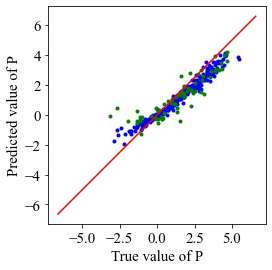

In [142]:
y_pred_train = model.predict((X_train))
print("Train set R^2: ", r2_score(y_train, y_pred_train))
print("Train MAE score: %.4f" % mean_absolute_error(y_train, y_pred_train))

y_pred_test = model.predict((X_test))
print("Test set R^2: ", r2_score(y_test, y_pred_test))
print("Test MAE score: %.4f" % mean_absolute_error(y_test, y_pred_test))

column = 4
ax=plt.subplot(1, 1, 1)
plt.plot(y_train.iloc[:,column], y_pred_train[:,column], 'b.') 
plt.plot(y_test.iloc[:,column], y_pred_test[:,column], 'g.') 
 
plt.xlabel("True value of P",fontname="Times New Roman", fontsize=15)
plt.ylabel("Predicted value of P",fontname="Times New Roman", fontsize=15)
x0, x1 = Y.min().min(), Y.max().max()
length = x1 - x0
x_start, x_end = x0-0.1*length, x1+0.1*length
#plt.xlim([x_start, x_end])
#plt.ylim([x_start, x_end])
#ax.set_xticks([-200,-100,0,100,200,300,400,500])
#ax.set_yticks([-200,-100,0,100,200,300,400,500])
plt.xticks(fontname="Times New Roman", fontsize=15)
plt.yticks(fontname="Times New Roman", fontsize=15)
plt.gca().set_aspect("equal", adjustable="box")
# the unit line
plt.plot(np.linspace(x_start, x_end, num=100), np.linspace(x_start, x_end, num=100), 'r-')